In [1]:
# Step 1: Load and explore data
import pandas as pd

# Load the dataset
user_df = pd.read_csv('data/user_data.csv')

# Display first 5 rows
user_df.head()


,Diabetes,Hypertension,Cardiovascular,Digestive Disorders,Food Allergies,Height,Weight,BMI Category,Target Weight,Weight Change History,...,Diet Type,Meal Size Preference,Spice Tolerance,Cuisine Preferences,Food Texture Preferences,Portion Control Ability,Previous Diet Success History,Food Intolerances,Preferred Meal Complexity,Seasonal Food Preferences
0,NaN,No,Present,NaN,NaN,170.0,67.9,Normal,71.5,Stable,...,Pescatarian,Small frequent,Low,Other,Crunchy,Fair,Yes,NaN,Moderate,Yes
1,NaN,No,Present,IBS,NaN,180.2,66.5,Normal,62.7,Stable,...,Vegetarian,Regular 3 meals,Medium,Other,Mixed,Fair,Yes,Lactose,Moderate,Yes
2,NaN,No,Absent,NaN,NaN,180.8,81.5,Overweight,60.3,Fluctuating,...,Non-spicy,Small frequent,Medium,Western,Soft,Poor,No,Gluten,Complex,No
3,Type 2,Yes,Present,NaN,Shellfish,170.4,63.0,Normal,60.3,Fluctuating,...,Pescatarian,Large infrequent,Medium,Asian,Crunchy,Fair,Yes,Lactose,Simple,No
4,Type 2,No,Absent,IBS,NaN,167.4,41.3,Underweight,47.8,Stable,...,Vegan,Small frequent,High,Other,Mixed,Good,No,Gluten,Complex,No


In [2]:
# Check data types
user_df.info()

# Check for missing values
user_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Diabetes                            883 non-null    object 
 1   Hypertension                        1999 non-null   object 
 2   Cardiovascular                      1999 non-null   object 
 3   Digestive Disorders                 897 non-null    object 
 4   Food Allergies                      860 non-null    object 
 5   Height                              1999 non-null   float64
 6   Weight                              1999 non-null   float64
 7   BMI Category                        1999 non-null   object 
 8   Target Weight                       1999 non-null   float64
 9   Weight Change History               1999 non-null   object 
 10  Exercise Frequency                  1999 non-null   int64  
 11  Exercise Duration                   1999 no

Diabetes                              1116
Hypertension                             0
Cardiovascular                           0
Digestive Disorders                   1102
Food Allergies                        1139
Height                                   0
Weight                                   0
BMI Category                             0
Target Weight                            0
Weight Change History                    0
Exercise Frequency                       0
Exercise Duration                        0
Exercise Type                          501
Daily Steps Count                        0
Physical Job Activity Level              0
Work Schedule                            0
Sleep Duration                           0
Sleep Quality                            0
Stress Level                             0
Meal Timing Regularity                   0
Cooking Skills                           0
Available Cooking Time                   0
Food Budget                              0
Alcohol Con

In [3]:
# Fill health-related missing values with "None"
health_cols = ['Diabetes', 'Digestive Disorders', 'Food Allergies', 'Food Intolerances']
for col in health_cols:
    user_df[col] = user_df[col].fillna('None')

# Fill remaining categorical nulls with "Unknown"
user_df['Exercise Type'] = user_df['Exercise Type'].fillna('Unknown')
user_df['Alcohol Consumption'] = user_df['Alcohol Consumption'].fillna('None')

# Sanity check
user_df.isnull().sum().sum()  # should be 0


0

In [5]:
#Check for missing values
user_df.isnull().sum()


Diabetes                              0
Hypertension                          0
Cardiovascular                        0
Digestive Disorders                   0
Food Allergies                        0
Height                                0
Weight                                0
BMI Category                          0
Target Weight                         0
Weight Change History                 0
Exercise Frequency                    0
Exercise Duration                     0
Exercise Type                         0
Daily Steps Count                     0
Physical Job Activity Level           0
Work Schedule                         0
Sleep Duration                        0
Sleep Quality                         0
Stress Level                          0
Meal Timing Regularity                0
Cooking Skills                        0
Available Cooking Time                0
Food Budget                           0
Alcohol Consumption                   0
Smoking Status                        0


In [4]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original
df_encoded = user_df.copy()

# Dictionary to store encoders (so we can decode later if needed)
label_encoders = {}

# Label Encode all categorical columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le  # store encoder

df_encoded.head()


,Diabetes,Hypertension,Cardiovascular,Digestive Disorders,Food Allergies,Height,Weight,BMI Category,Target Weight,Weight Change History,...,Diet Type,Meal Size Preference,Spice Tolerance,Cuisine Preferences,Food Texture Preferences,Portion Control Ability,Previous Diet Success History,Food Intolerances,Preferred Meal Complexity,Seasonal Food Preferences
0,0,0,1,2,1,170.0,67.9,0,71.5,1,...,1,2,1,2,0,0,1,2,1,1
1,0,0,1,1,1,180.2,66.5,0,62.7,1,...,3,1,2,2,1,0,1,1,1,1
2,0,0,0,2,1,180.8,81.5,2,60.3,0,...,0,2,2,3,2,2,0,0,0,0
3,2,1,1,2,3,170.4,63.0,0,60.3,0,...,1,0,2,0,0,0,1,1,2,0
4,2,0,0,1,1,167.4,41.3,3,47.8,1,...,2,2,0,2,1,1,0,0,0,0


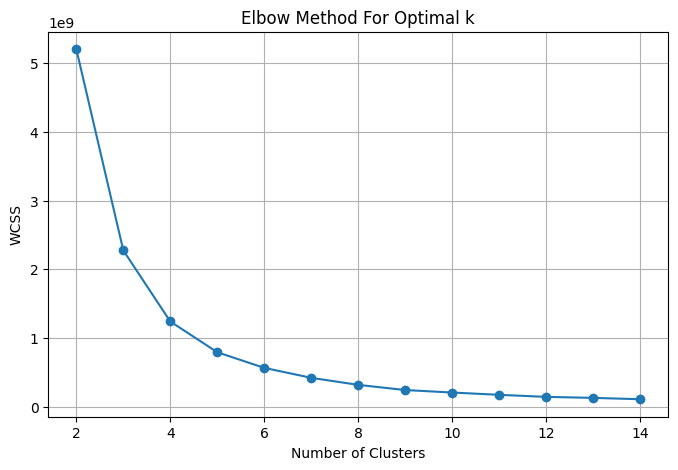

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method
wcss = []

for k in range(2, 15):  # trying k=2 to 14
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(2, 15), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [6]:
# Final KMeans model
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
user_df['Cluster'] = kmeans.fit_predict(df_encoded)

# Preview with cluster labels
user_df[['Cluster'] + user_df.columns[:5].tolist()]  # show first few columns + cluster


,Cluster,Diabetes,Hypertension,Cardiovascular,Digestive Disorders,Food Allergies
0,0,None,No,Present,None,None
1,1,None,No,Present,IBS,None
2,3,None,No,Absent,None,None
3,0,Type 2,Yes,Present,None,Shellfish
4,2,Type 2,No,Absent,IBS,None
...,...,...,...,...,...,...
1994,2,Type 2,No,Present,IBS,Shellfish
1995,2,Type 2,No,Present,Celiac,Shellfish
1996,1,Type 1,No,Present,IBS,Shellfish
1997,2,Type 2,Yes,Present,IBS,Dairy


In [7]:
# Analyze cluster characteristics
cluster_profile = user_df.groupby('Cluster')[['Diabetes', 'Hypertension', 'Cardiovascular', 'Digestive Disorders', 'Food Allergies']].agg(lambda x: x.value_counts().index[0])
cluster_profile


,Diabetes,Hypertension,Cardiovascular,Digestive Disorders,Food Allergies
Cluster,,,,,
0,None,Yes,Absent,None,None
1,None,Yes,Absent,None,None
2,None,Yes,Absent,None,None
3,None,No,Present,None,None


In [8]:
# For deeper stats
user_df.groupby('Cluster')[['Diabetes', 'Hypertension', 'Cardiovascular', 'Digestive Disorders', 'Food Allergies']].value_counts(normalize=True)


Cluster  Diabetes  Hypertension  Cardiovascular  Digestive Disorders  Food Allergies
0        None      Yes           Absent          None                 None              0.064078
                   No            Present         None                 None              0.060194
                                 Absent          None                 None              0.056311
                   Yes           Present         None                 None              0.054369
         Type 2    No            Present         None                 None              0.036893
                                                                                          ...   
3        Type 2    No            Present         None                 Dairy             0.001812
                   Yes           Absent          Celiac               None              0.001812
                                                 IBS                  None              0.001812
                                 Present  

In [9]:
# Analyze cluster characteristics
cluster_profile = user_df.groupby('Cluster')[['Diabetes', 'Hypertension', 'Cardiovascular', 'Digestive Disorders', 'Food Allergies']].agg(lambda x: x.value_counts().index[0])
cluster_profile


,Diabetes,Hypertension,Cardiovascular,Digestive Disorders,Food Allergies
Cluster,,,,,
0,None,Yes,Absent,None,None
1,None,Yes,Absent,None,None
2,None,Yes,Absent,None,None
3,None,No,Present,None,None


In [10]:
# Define recipe characteristics for each cluster
cluster_recipe_preferences = {
    0: {
        'health_focus': 'heart_healthy',  # Hypertension present
        'calorie_range': (1500, 2000),    # Example range, adjust based on BMI/activity
        'sodium': 'low',                  # For hypertension
        'meal_complexity': 'moderate',    # Based on cluster profile
    },
    1: {
        'health_focus': 'low_sodium',     # Hypertension present
        'calorie_range': (1800, 2200),    # Different range for this cluster
        'protein': 'high',                # Example preference
        'meal_complexity': 'simple',      # Based on cluster profile
    },
    2: {
        'health_focus': 'balanced',       # Hypertension present
        'calorie_range': (1600, 2100),    # Another range
        'fiber': 'high',                  # Example preference
        'meal_complexity': 'advanced',    # Based on cluster profile
    },
    3: {
        'health_focus': 'heart_healthy',  # Cardiovascular present
        'calorie_range': (1400, 1900),    # Lower calories
        'fat': 'low',                     # Lower fat for cardiovascular health
        'meal_complexity': 'moderate',    # Based on cluster profile
    }
}


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load recipe data
recipes_df = pd.read_csv('data/recipes.csv')

# Add nutritional category features
def categorize_recipes(recipes_df):
    """
    Categorize recipes based on their nutritional content and complexity
    using the actual columns available in the dataset
    """
    # Create a copy to avoid modifying the original
    df = recipes_df.copy()
    
    # Convert boolean columns to integers if they're not already
    bool_cols = ['vegetarian', 'vegan', 'gluten_free', 'diabetes_friendly', 
                 'heart_healthy', 'low_sodium']
    for col in bool_cols:
        if col in df.columns:
            df[col] = df[col].astype(int)
    
    # Create balanced meal category
    if all(col in df.columns for col in ['protein', 'carbs', 'fat']):
        df['balanced'] = (
            (df['protein'] > 15) & 
            (df['carbs'] > 20) & 
            (df['carbs'] < 45) & 
            (df['fat'] > 8) & 
            (df['fat'] < 20)
        ).astype(int)
    else:
        print("Warning: Missing columns for balanced categorization")
        df['balanced'] = 0
    
    # Calorie categorization
    if 'calories' in df.columns:
        df['low_calorie'] = (df['calories'] < 250).astype(int)
        df['medium_calorie'] = ((df['calories'] >= 250) & (df['calories'] < 350)).astype(int)
        df['high_calorie'] = (df['calories'] >= 350).astype(int)
    else:
        print("Warning: Missing calories column")
        df['low_calorie'] = df['medium_calorie'] = df['high_calorie'] = 0
    
    # Meal type categorization
    if 'meal_type' in df.columns:
        df['is_breakfast'] = (df['meal_type'] == 'breakfast').astype(int)
        df['is_lunch'] = (df['meal_type'] == 'lunch').astype(int)
        df['is_dinner'] = (df['meal_type'] == 'dinner').astype(int)
    else:
        print("Warning: Missing meal_type column")
        df['is_breakfast'] = df['is_lunch'] = df['is_dinner'] = 0
    
    # Complexity categorization based on cooking_difficulty or prep_time
    if 'cooking_difficulty' in df.columns:
        df['simple'] = (df['cooking_difficulty'] == 'Easy').astype(int)
        df['moderate'] = (df['cooking_difficulty'] == 'Medium').astype(int)
        df['advanced'] = (df['cooking_difficulty'] == 'Hard').astype(int)
    elif 'prep_time' in df.columns:
        df['simple'] = (df['prep_time'] <= 15).astype(int)
        df['moderate'] = ((df['prep_time'] > 15) & (df['prep_time'] <= 30)).astype(int)
        df['advanced'] = (df['prep_time'] > 30).astype(int)
    else:
        # If no direct complexity indicators, try to use n_steps if available
        if 'n_steps' in df.columns:
            df['simple'] = (df['n_steps'] <= 5).astype(int)
            df['moderate'] = ((df['n_steps'] > 5) & (df['n_steps'] <= 10)).astype(int)
            df['advanced'] = (df['n_steps'] > 10).astype(int)
        else:
            print("Warning: No columns available for complexity categorization")
            df['simple'] = df['moderate'] = df['advanced'] = 0
    
    # Count ingredients if needed and not already available
    if 'ingredients_count' not in df.columns and 'ingredients' in df.columns:
        # Check if ingredients is a string that needs parsing
        if isinstance(df['ingredients'].iloc[0], str):
            # Try to count ingredients by splitting the string
            df['ingredients_count'] = df['ingredients'].apply(lambda x: len(x.split(',')))
    
    return df

# Apply categorization
recipes_df = categorize_recipes(recipes_df)

# Display the first few rows to verify
print(recipes_df.head())

# Check which new columns were created
print("\nNew columns added:")
print(recipes_df.columns)


   recipe_id                                      name  meal_type  protein  \
0          1  Greek Yogurt with Berries and Chia Seeds  breakfast       18   
1          2            Avocado Toast with Poached Egg  breakfast       14   
2          3             Spinach and Mushroom Omelette  breakfast       20   
3          4         Overnight Oats with Almond Butter  breakfast       12   
4          5                   Breakfast Smoothie Bowl  breakfast       15   

   carbs  fat  calories  sodium  fiber  \
0     25    6       240      70      8   
1     28   15       320     380      7   
2      5   16       280     320      2   
3     45   10       310      50      8   
4     35    8       270      60      6   

                                         ingredients  ... low_calorie  \
0     Greek yogurt, mixed berries, chia seeds, honey  ...           1   
1  Whole grain bread, avocado, egg, tomato, salt,...  ...           0   
2   Eggs, spinach, mushrooms, feta cheese, olive oil  ...  

In [14]:
# Calculate recipe suitability for each cluster
def calculate_recipe_cluster_suitability(recipes_df, cluster_preferences):
    """Calculate how suitable each recipe is for each cluster"""
    
    suitability_scores = pd.DataFrame(index=recipes_df.index)
    
    for cluster, preferences in cluster_preferences.items():
        scores = np.ones(len(recipes_df))
        
        # Health focus score
        if preferences['health_focus'] == 'heart_healthy' and 'heart_healthy' in recipes_df.columns:
            scores *= (1 + recipes_df['heart_healthy'])
        
        if preferences['health_focus'] == 'low_sodium' and 'low_sodium' in recipes_df.columns:
            scores *= (1 + recipes_df['low_sodium'])
        
        if preferences['health_focus'] == 'balanced' and 'balanced' in recipes_df.columns:
            scores *= (1 + recipes_df['balanced'])
        
        # Calorie range score - adjust for your actual calorie ranges
        min_cal, max_cal = preferences['calorie_range']
        # Scale down to match your recipe calorie range (which is around 220-400)
        scaled_min = min_cal / 5  # e.g., 1500/5 = 300
        scaled_max = max_cal / 5  # e.g., 2000/5 = 400
        
        calorie_score = 1 - abs(recipes_df['calories'] - ((scaled_min + scaled_max) / 2)) / (scaled_max - scaled_min)
        calorie_score = np.clip(calorie_score, 0.1, 1.0)
        scores *= calorie_score
        
        # Diabetes-friendly score
        if 'diabetes_friendly' in recipes_df.columns:
            scores *= (1 + 0.5 * recipes_df['diabetes_friendly'])
        
        # Meal complexity preference
        if preferences['meal_complexity'] == 'simple' and 'simple' in recipes_df.columns:
            scores *= (1 + recipes_df['simple'])
        elif preferences['meal_complexity'] == 'moderate' and 'moderate' in recipes_df.columns:
            scores *= (1 + recipes_df['moderate'])
        elif preferences['meal_complexity'] == 'advanced' and 'advanced' in recipes_df.columns:
            scores *= (1 + recipes_df['advanced'])
        
        # Add the scores to the dataframe
        suitability_scores[f'cluster_{cluster}'] = scores
    
    return suitability_scores

# Calculate suitability scores
suitability_scores = calculate_recipe_cluster_suitability(recipes_df, cluster_recipe_preferences)

# Add scores to recipes
recipes_with_scores = pd.concat([recipes_df, suitability_scores], axis=1)

# Display the first few rows with suitability scores
print("Recipes with cluster suitability scores:")
print(recipes_with_scores[['name', 'meal_type', 'calories', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3']].head())


Recipes with cluster suitability scores:
                                       name  meal_type  calories  cluster_0  \
0  Greek Yogurt with Berries and Chia Seeds  breakfast       240        0.3   
1            Avocado Toast with Poached Egg  breakfast       320        4.2   
2             Spinach and Mushroom Omelette  breakfast       280        1.8   
3         Overnight Oats with Almond Butter  breakfast       310        1.8   
4                   Breakfast Smoothie Bowl  breakfast       270        0.6   

   cluster_1  cluster_2  cluster_3  
0       0.60       0.15        0.3  
1       0.15       0.75        5.4  
2       0.30       0.15        3.0  
3       0.60       0.60        2.4  
4       0.60       0.15        1.2  


In [29]:
# Create training data with explicit feature weighting
def create_prioritized_training_data(user_df, recipes_df, suitability_scores):
    X = []
    y = []
    feature_names = []
    
    # Get user features
    user_features = [col for col in df_encoded.columns if col != 'Cluster']
    feature_names.extend(user_features)
    
    # Add recipe features
    recipe_features = ['calories', 'protein', 'carbs', 'fat', 'fiber', 'sodium']
    feature_names.extend(recipe_features)
    
    # Define feature priority groups
    health_conditions = ['Diabetes', 'Hypertension', 'Cardiovascular', 'Digestive Disorders', 'Food Allergies']
    bmi_parameters = ['Height', 'Weight', 'BMI Category', 'Target Weight', 'Weight Change History']
    dietary_preferences = ['Diet Type', 'Food Intolerances', 'Cuisine Preferences', 'Spice Tolerance']
    
    # Find indices of priority features
    health_indices = [feature_names.index(col) for col in health_conditions if col in feature_names]
    bmi_indices = [feature_names.index(col) for col in bmi_parameters if col in feature_names]
    diet_indices = [feature_names.index(col) for col in dietary_preferences if col in feature_names]
    
    # Create training data with explicit rules
    for i, user in user_df.iterrows():
        # Sample every other user to reduce dataset size
        if i % 2 != 0:
            continue
            
        cluster = user['Cluster']
        user_feature_values = df_encoded.loc[i, user_features].values
        
        # Get some recipes
        suitable_recipes = recipes_df.loc[suitability_scores[f'cluster_{cluster}'].nlargest(5).index]
        unsuitable_recipes = recipes_df.loc[suitability_scores[f'cluster_{cluster}'].nsmallest(5).index]
        random_recipes = recipes_df.drop(index=list(suitable_recipes.index) + list(unsuitable_recipes.index)).sample(5)
        
        all_recipes = pd.concat([suitable_recipes, unsuitable_recipes, random_recipes])
        
        for _, recipe in all_recipes.iterrows():
            # Create base feature vector
            features = list(user_feature_values)
            for col in recipe_features:
                features.append(recipe[col])
            
            # Determine suitability with explicit priority rules
            suitable = True
            
            # 1. HEALTH CONDITIONS (highest priority)
            if user['Diabetes'] in ['Type 1', 'Type 2']:
                if recipe['diabetes_friendly'] == 0 or recipe['carbs'] > 30:
                    suitable = False
            
            if user['Hypertension'] == 'Yes':
                if recipe['low_sodium'] == 0 or recipe['sodium'] > 400:
                    suitable = False
            
            if user['Cardiovascular'] == 'Present':
                if recipe['heart_healthy'] == 0 or recipe['fat'] > 15:
                    suitable = False
            
            if user['Digestive Disorders'] == 'Celiac':
                if recipe['gluten_free'] == 0:
                    suitable = False
            
            # 2. DIETARY RESTRICTIONS (second priority)
            if user['Diet Type'] == 'Vegan':
                if recipe['vegan'] == 0:
                    suitable = False
            elif user['Diet Type'] == 'Vegetarian':
                if recipe['vegetarian'] == 0:
                    suitable = False
            
            if user['Food Allergies'] == 'Nuts':
                if 'nut' in str(recipe['ingredients']).lower():
                    suitable = False
            
            # 3. BMI PARAMETERS (third priority)
            if user['BMI Category'] == 'Overweight' or user['BMI Category'] == 'Obese':
                if recipe['calories'] > 350:
                    suitable = 0.5  # Reduce suitability but don't eliminate
            
            # Add example with appropriate label
            X.append(features)
            y.append(1 if suitable == True else 0)
    
    return np.array(X), np.array(y), feature_names

# Create prioritized training data
print("Creating prioritized training data...")
X_priority, y_priority, feature_names = create_prioritized_training_data(user_df, recipes_df, suitability_scores)
print(f"Created training data with {len(X_priority)} samples")

# Split into training and testing sets
X_train_priority, X_test_priority, y_train_priority, y_test_priority = train_test_split(X_priority, y_priority, test_size=0.2, random_state=42)

# Create a model with feature importance weighting
from sklearn.ensemble import RandomForestClassifier

# Train the prioritized model
print("Training prioritized Random Forest model...")
rf_model_priority = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,           
    min_samples_split=5,    
    min_samples_leaf=2,     
    max_features='sqrt',    
    class_weight='balanced', 
    random_state=42
)
rf_model_priority.fit(X_train_priority, y_train_priority)

# Evaluate the prioritized model
train_accuracy = rf_model_priority.score(X_train_priority, y_train_priority)
test_accuracy = rf_model_priority.score(X_test_priority, y_test_priority)

print(f"Prioritized model training accuracy: {train_accuracy:.4f}")
print(f"Prioritized model test accuracy: {test_accuracy:.4f}")
print(f"Difference: {train_accuracy - test_accuracy:.4f}")

# Feature importance for prioritized model
feature_importance_priority = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model_priority.feature_importances_
})
feature_importance_priority = feature_importance_priority.sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (Prioritized Model):")
print(feature_importance_priority.head(15))

# Save the prioritized model
joblib.dump(rf_model_priority, 'models/diet_recommendation_model_priority.pkl')


Creating prioritized training data...
Created training data with 15000 samples
Training prioritized Random Forest model...
Prioritized model training accuracy: 0.9945
Prioritized model test accuracy: 0.9727
Difference: 0.0218

Top 15 Most Important Features (Prioritized Model):
                Feature  Importance
30            Diet Type    0.162319
45               sodium    0.118825
0              Diabetes    0.089450
41              protein    0.078844
1          Hypertension    0.078434
40             calories    0.058059
42                carbs    0.055345
44                fiber    0.041874
43                  fat    0.040929
3   Digestive Disorders    0.018265
13    Daily Steps Count    0.016213
6                Weight    0.015598
18         Stress Level    0.014272
8         Target Weight    0.014110
5                Height    0.013626


['models/diet_recommendation_model_priority.pkl']

In [31]:
# Calculate training and test accuracy
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Difference: {train_accuracy - test_accuracy:.4f}")


Training accuracy: 1.0000
Test accuracy: 0.9990
Difference: 0.0010


In [32]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validation scores: [0.99949975 0.99824912 0.99849925 0.99974987 0.99924962]
Mean CV score: 0.9990
Standard deviation: 0.0006


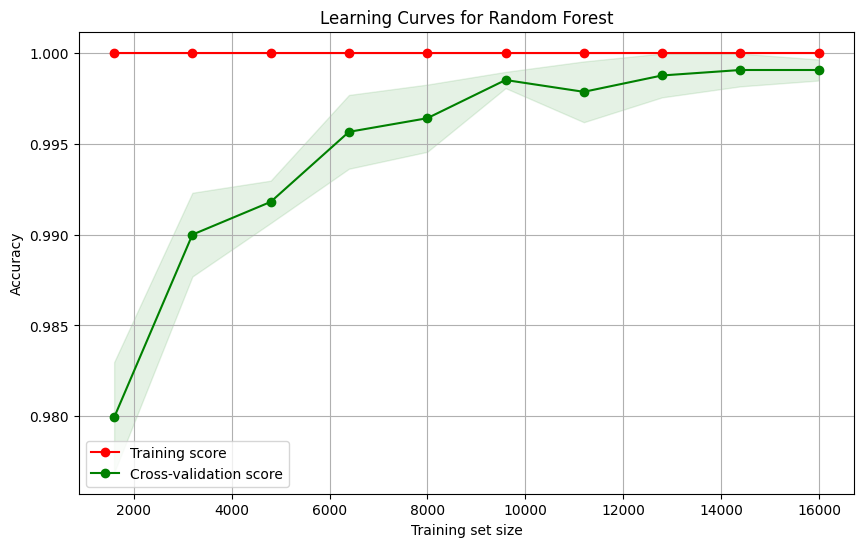

In [33]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Random Forest')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [34]:
def recommend_recipes_for_user(user_params, rf_model, recipes_df, kmeans_model, label_encoders, feature_names):
    """
    Recommend recipes for a new user based on their parameters with dietary restrictions as hard constraints
    """
    # Error handling and validation
    if not user_params:
        raise ValueError("User parameters cannot be empty")
        
    if not isinstance(recipes_df, pd.DataFrame) or len(recipes_df) == 0:
        raise ValueError("Recipe database is empty or invalid")
    
    # STEP 1: Apply hard constraints first - CRITICAL FIX
    filtered_recipes = recipes_df.copy()
    
    # Filter by dietary type
    if user_params.get('Diet Type') == 'Vegan':
        filtered_recipes = filtered_recipes[filtered_recipes['vegan'] == 1]
        if len(filtered_recipes) < 5:
            print("Warning: Few vegan recipes available. Consider expanding your recipe database.")
    elif user_params.get('Diet Type') == 'Vegetarian':
        filtered_recipes = filtered_recipes[filtered_recipes['vegetarian'] == 1]
    
    # Helper function for keyword filtering
    def filter_by_keywords(df, column, keywords, exclude=True):
        """Filter dataframe by multiple keywords in a column"""
        mask = pd.Series(False if exclude else True, index=df.index)
        for keyword in keywords:
            if exclude:
                mask |= df[column].str.contains(keyword, case=False, na=False)
            else:
                mask &= df[column].str.contains(keyword, case=False, na=False)
        return df[~mask] if exclude else df[mask]
    
    # Filter by food allergies
    if user_params.get('Food Allergies') == 'Nuts':
        if 'ingredients' in filtered_recipes.columns:
            nut_keywords = ['nut', 'almond', 'cashew', 'walnut', 'pecan', 'hazelnut', 'pistachio']
            filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', nut_keywords)
    elif user_params.get('Food Allergies') == 'Dairy':
        dairy_keywords = ['milk', 'cheese', 'yogurt', 'cream', 'butter']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', dairy_keywords)
    elif user_params.get('Food Allergies') == 'Shellfish':
        shellfish_keywords = ['shrimp', 'crab', 'lobster', 'clam', 'mussel', 'scallop']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', shellfish_keywords)
    
    # Filter by food intolerances
    if user_params.get('Food Intolerances') == 'Gluten':
        filtered_recipes = filtered_recipes[filtered_recipes['gluten_free'] == 1]
    elif user_params.get('Food Intolerances') == 'Lactose':
        dairy_keywords = ['milk', 'cheese', 'yogurt', 'cream', 'butter']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', dairy_keywords)
    
    # Ensure we have enough recipes after filtering
    if len(filtered_recipes) < 5:
        print("Warning: Very few recipes match all dietary restrictions. Relaxing some constraints.")
        filtered_recipes = recipes_df.copy()
        # Apply only the most critical constraint
        if user_params.get('Diet Type') == 'Vegan':
            filtered_recipes = filtered_recipes[filtered_recipes['vegan'] == 1]
        elif user_params.get('Diet Type') == 'Vegetarian':
            filtered_recipes = filtered_recipes[filtered_recipes['vegetarian'] == 1]
    
    # STEP 2: Process user parameters for clustering
    user_features = []
    for feature in feature_names:
        if feature in user_params:
            if feature in label_encoders:
                if user_params[feature] in label_encoders[feature].classes_:
                    user_features.append(label_encoders[feature].transform([user_params[feature]])[0])
                else:
                    # Handle unseen categories
                    user_features.append(0)
            else:
                # If numerical, use as is
                user_features.append(user_params[feature])
        elif feature in ['calories', 'protein', 'carbs', 'fat', 'fiber', 'sodium']:
            # Skip recipe features for clustering
            continue
        else:
            # Missing feature, use default value
            user_features.append(0)
    
    # STEP 3: Determine user's cluster
    user_cluster = kmeans_model.predict([user_features])[0]
    
    # STEP 4: Get recipes with high suitability from the FILTERED recipes
    cluster_col = f'cluster_{user_cluster}'
    if cluster_col in filtered_recipes.columns and not filtered_recipes[cluster_col].isna().all():
        cluster_suitable_recipes = filtered_recipes[filtered_recipes[cluster_col] > 0.7]
        
        # If too few recipes, get top recipes for this cluster
        if len(cluster_suitable_recipes) < 10:
            top_indices = filtered_recipes[cluster_col].nlargest(min(10, len(filtered_recipes))).index
            cluster_suitable_recipes = filtered_recipes.loc[top_indices]
    else:
        # If cluster column doesn't exist or contains only NaN values
        print(f"Warning: Cluster {user_cluster} data not found. Using recipe similarity instead.")
        # Use all filtered recipes
        cluster_suitable_recipes = filtered_recipes
    
    # STEP 5: Score individual recipes
    recipe_scores = []
    for idx, recipe in cluster_suitable_recipes.iterrows():
        # Create feature vector for this user-recipe pair
        features = user_features.copy()
        
        # Add recipe features
        for col in ['calories', 'protein', 'carbs', 'fat', 'fiber', 'sodium']:
            if col in recipe:
                features.append(recipe[col])
            else:
                features.append(0)
        
        # Get prediction probability
        try:
            prob = rf_model.predict_proba([features])[0][1]  # Probability of class 1 (suitable)
            recipe_scores.append((idx, prob))
        except:
            # Handle prediction errors gracefully
            print(f"Warning: Error predicting suitability for recipe {idx}. Skipping.")
    
    # STEP 6: Apply health condition-specific adjustments
    recipe_scores_adjusted = []
    for idx, score in recipe_scores:
        recipe = filtered_recipes.loc[idx]
        adjusted_score = score
        
        # Diabetes-specific adjustments
        if user_params.get('Diabetes') in ['Type 1', 'Type 2', 'Gestational']:
            if recipe['carbs'] > 30:
                adjusted_score *= 0.8  # Reduce score for high-carb meals
            elif recipe['carbs'] < 15 and recipe['protein'] > 20:
                adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost low-carb, high-protein meals
        
        # Hypertension-specific adjustments
        if user_params.get('Hypertension') == 'Yes':
            if recipe['sodium'] > 400:
                adjusted_score *= 0.7  # Significantly reduce score for high-sodium meals
            elif recipe['sodium'] < 200:
                adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost low-sodium meals
        
        # Cardiovascular-specific adjustments
        if user_params.get('Cardiovascular') == 'Present':
            if recipe['fat'] > 15:
                adjusted_score *= 0.8  # Reduce score for high-fat meals
            elif recipe['fiber'] > 5:
                adjusted_score = min(adjusted_score * 1.1, 1.0)  # Boost high-fiber meals
        
        # Digestive disorder adjustments
        if user_params.get('Digestive Disorders') == 'IBS':
            if recipe['fiber'] > 8:
                adjusted_score *= 0.9  # Reduce score for very high fiber (may trigger IBS)
        elif user_params.get('Digestive Disorders') == 'Celiac':
            if recipe['gluten_free'] == 0:
                adjusted_score = 0  # Zero score for non-gluten-free recipes
        
        # Activity level adjustments
        activity_level = user_params.get('Physical Job Activity Level')
        exercise_frequency = user_params.get('Exercise Frequency', 0)

        if (activity_level == 'Active' or exercise_frequency >= 5) and recipe['calories'] < 300:
            adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost higher calorie meals for active users
        elif (activity_level == 'Sedentary' and exercise_frequency <= 2) and recipe['calories'] > 350:
            adjusted_score *= 0.8  # Reduce score for high-calorie meals for sedentary users
        
        # Time constraint adjustments
        cooking_time = user_params.get('Available Cooking Time', 30)
        if 'prep_time' in recipe and recipe['prep_time'] > cooking_time:
            adjusted_score *= 0.7  # Significantly reduce score for recipes that take too long
        
        recipe_scores_adjusted.append((idx, adjusted_score))
    
    # STEP 7: Sort by adjusted scores
    recipe_scores_adjusted.sort(key=lambda x: x[1], reverse=True)
    
    # STEP 8: Organize recipes by meal type for balanced recommendations
    breakfast_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                         if filtered_recipes.loc[idx, 'meal_type'] == 'breakfast']
    lunch_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                     if filtered_recipes.loc[idx, 'meal_type'] == 'lunch']
    dinner_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                      if filtered_recipes.loc[idx, 'meal_type'] == 'dinner']
    
    # Sort each meal type by score
    breakfast_recipes.sort(key=lambda x: x[1], reverse=True)
    lunch_recipes.sort(key=lambda x: x[1], reverse=True)
    dinner_recipes.sort(key=lambda x: x[1], reverse=True)
    
    # Get top recipes for each meal type (balanced selection)
    top_indices = []
    top_scores = []
    
    # Add top breakfast recipes
    for idx, score in breakfast_recipes[:min(3, len(breakfast_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Add top lunch recipes
    for idx, score in lunch_recipes[:min(4, len(lunch_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Add top dinner recipes
    for idx, score in dinner_recipes[:min(4, len(dinner_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Handle missing meal types
    if not breakfast_recipes:
        # Add more lunch and dinner options if no breakfast options
        extra_lunch = lunch_recipes[min(4, len(lunch_recipes)):min(5, len(lunch_recipes))]
        for idx, score in extra_lunch:
            top_indices.append(idx)
            top_scores.append(score)
        
        extra_dinner = dinner_recipes[min(4, len(dinner_recipes)):min(5, len(dinner_recipes))]
        for idx, score in extra_dinner:
            top_indices.append(idx)
            top_scores.append(score)
    
    # STEP 9: Create final recommendations dataframe
    if top_indices:
        recommended_recipes = filtered_recipes.loc[top_indices].copy()
        recommended_recipes['suitability_score'] = top_scores
        
        # Add health condition-specific notes
        if user_params.get('Diabetes') in ['Type 1', 'Type 2', 'Gestational']:
            recommended_recipes['note'] = 'Monitor carbohydrate intake with this meal'
        elif user_params.get('Hypertension') == 'Yes':
            recommended_recipes['note'] = 'Low sodium option recommended'
        elif user_params.get('Cardiovascular') == 'Present':
            recommended_recipes['note'] = 'Heart-healthy option'
        else:
            recommended_recipes['note'] = 'Balanced meal option'
    else:
        # If no recommendations found, provide basic recommendations
        print("Warning: No suitable recipes found. Relaxing all constraints to provide basic recommendations.")
        # Provide at least some basic recommendations by ignoring all constraints
        # except the most critical dietary restriction
        basic_recipes = recipes_df.copy()
        if user_params.get('Diet Type') == 'Vegan':
            basic_recipes = basic_recipes[basic_recipes['vegan'] == 1]
        elif user_params.get('Diet Type') == 'Vegetarian':
            basic_recipes = basic_recipes[basic_recipes['vegetarian'] == 1]
        
        # Get a few recipes of each meal type
        breakfast = basic_recipes[basic_recipes['meal_type'] == 'breakfast'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'breakfast'])))
        lunch = basic_recipes[basic_recipes['meal_type'] == 'lunch'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'lunch'])))
        dinner = basic_recipes[basic_recipes['meal_type'] == 'dinner'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'dinner'])))
        
        recommended_recipes = pd.concat([breakfast, lunch, dinner])
        recommended_recipes['suitability_score'] = 0.5  # Indicate these are fallback recommendations
        recommended_recipes['note'] = 'Basic recommendation (no optimal match found)'
    
    return recommended_recipes.sort_values(['meal_type', 'suitability_score'], ascending=[True, False])


In [36]:
def recommend_recipes_for_user(user_params, rf_model, recipes_df, kmeans_model, label_encoders, feature_names):
    """
    Recommend recipes for a new user based on their parameters with dietary restrictions as hard constraints
    and health condition-specific adjustments
    
    Args:
        user_params: Dictionary with all 40 user parameters
        rf_model: Trained Random Forest model
        recipes_df: DataFrame with recipe data
        kmeans_model: Trained KMeans model
        label_encoders: Dictionary of label encoders for categorical features
        feature_names: List of feature names used for training
        
    Returns:
        DataFrame with recommended recipes
    """
    # Error handling and validation
    if not user_params:
        raise ValueError("User parameters cannot be empty")
        
    if not isinstance(recipes_df, pd.DataFrame) or len(recipes_df) == 0:
        raise ValueError("Recipe database is empty or invalid")
    
    # STEP 1: Apply hard constraints first - CRITICAL FIX
    filtered_recipes = recipes_df.copy()
    
    # Filter by dietary type
    if user_params.get('Diet Type') == 'Vegan':
        filtered_recipes = filtered_recipes[filtered_recipes['vegan'] == 1]
        if len(filtered_recipes) < 5:
            print("Warning: Few vegan recipes available. Consider expanding your recipe database.")
    elif user_params.get('Diet Type') == 'Vegetarian':
        filtered_recipes = filtered_recipes[filtered_recipes['vegetarian'] == 1]
    
    # Helper function for keyword filtering
    def filter_by_keywords(df, column, keywords, exclude=True):
        """Filter dataframe by multiple keywords in a column"""
        mask = pd.Series(False if exclude else True, index=df.index)
        for keyword in keywords:
            if exclude:
                mask |= df[column].str.contains(keyword, case=False, na=False)
            else:
                mask &= df[column].str.contains(keyword, case=False, na=False)
        return df[~mask] if exclude else df[mask]
    
    # Filter by food allergies
    if user_params.get('Food Allergies') == 'Nuts':
        if 'ingredients' in filtered_recipes.columns:
            nut_keywords = ['nut', 'almond', 'cashew', 'walnut', 'pecan', 'hazelnut', 'pistachio']
            filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', nut_keywords)
    elif user_params.get('Food Allergies') == 'Dairy':
        dairy_keywords = ['milk', 'cheese', 'yogurt', 'cream', 'butter']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', dairy_keywords)
    elif user_params.get('Food Allergies') == 'Shellfish':
        shellfish_keywords = ['shrimp', 'crab', 'lobster', 'clam', 'mussel', 'scallop']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', shellfish_keywords)
    
    # Filter by food intolerances
    if user_params.get('Food Intolerances') == 'Gluten':
        filtered_recipes = filtered_recipes[filtered_recipes['gluten_free'] == 1]
    elif user_params.get('Food Intolerances') == 'Lactose':
        dairy_keywords = ['milk', 'cheese', 'yogurt', 'cream', 'butter']
        filtered_recipes = filter_by_keywords(filtered_recipes, 'ingredients', dairy_keywords)
    
    # Ensure we have enough recipes after filtering
    if len(filtered_recipes) < 5:
        print("Warning: Very few recipes match all dietary restrictions. Relaxing some constraints.")
        filtered_recipes = recipes_df.copy()
        # Apply only the most critical constraint
        if user_params.get('Diet Type') == 'Vegan':
            filtered_recipes = filtered_recipes[filtered_recipes['vegan'] == 1]
        elif user_params.get('Diet Type') == 'Vegetarian':
            filtered_recipes = filtered_recipes[filtered_recipes['vegetarian'] == 1]
    
    # STEP 2: Process user parameters for clustering
    user_features = []
    for feature in feature_names:
        if feature in user_params:
            if feature in label_encoders:
                if user_params[feature] in label_encoders[feature].classes_:
                    user_features.append(label_encoders[feature].transform([user_params[feature]])[0])
                else:
                    # Handle unseen categories
                    user_features.append(0)
            else:
                # If numerical, use as is
                user_features.append(user_params[feature])
        elif feature in ['calories', 'protein', 'carbs', 'fat', 'fiber', 'sodium']:
            # Skip recipe features for clustering
            continue
        else:
            # Missing feature, use default value
            user_features.append(0)
    
    # STEP 3: Determine user's cluster
    user_cluster = kmeans_model.predict([user_features])[0]
    
    # STEP 4: Get recipes with high suitability from the FILTERED recipes
    cluster_col = f'cluster_{user_cluster}'
    if cluster_col in filtered_recipes.columns and not filtered_recipes[cluster_col].isna().all():
        cluster_suitable_recipes = filtered_recipes[filtered_recipes[cluster_col] > 0.7]
        
        # If too few recipes, get top recipes for this cluster
        if len(cluster_suitable_recipes) < 10:
            top_indices = filtered_recipes[cluster_col].nlargest(min(10, len(filtered_recipes))).index
            cluster_suitable_recipes = filtered_recipes.loc[top_indices]
    else:
        # If cluster column doesn't exist or contains only NaN values
        print(f"Warning: Cluster {user_cluster} data not found. Using recipe similarity instead.")
        # Use all filtered recipes
        cluster_suitable_recipes = filtered_recipes
    
    # STEP 5: Score individual recipes
    recipe_scores = []
    for idx, recipe in cluster_suitable_recipes.iterrows():
        # Create feature vector for this user-recipe pair
        features = user_features.copy()
        
        # Add recipe features
        for col in ['calories', 'protein', 'carbs', 'fat', 'fiber', 'sodium']:
            if col in recipe:
                features.append(recipe[col])
            else:
                features.append(0)
        
        # Get prediction probability
        try:
            prob = rf_model.predict_proba([features])[0][1]  # Probability of class 1 (suitable)
            recipe_scores.append((idx, prob))
        except Exception as e:
            # Handle prediction errors gracefully
            print(f"Warning: Error predicting suitability for recipe {idx}: {e}")
    
    # STEP 6: Apply health condition-specific adjustments
    recipe_scores_adjusted = []
    for idx, score in recipe_scores:
        recipe = filtered_recipes.loc[idx]
        adjusted_score = score
        
        # Diabetes-specific adjustments
        if user_params.get('Diabetes') in ['Type 1', 'Type 2', 'Gestational']:
            if recipe['carbs'] > 30:
                adjusted_score *= 0.8  # Reduce score for high-carb meals
            elif recipe['carbs'] < 15 and recipe['protein'] > 20:
                adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost low-carb, high-protein meals
        
        # Hypertension-specific adjustments
        if user_params.get('Hypertension') == 'Yes':
            if recipe['sodium'] > 400:
                adjusted_score *= 0.7  # Significantly reduce score for high-sodium meals
            elif recipe['sodium'] < 200:
                adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost low-sodium meals
        
        # Cardiovascular-specific adjustments
        if user_params.get('Cardiovascular') == 'Present':
            if recipe['fat'] > 15:
                adjusted_score *= 0.8  # Reduce score for high-fat meals
            elif recipe['fiber'] > 5:
                adjusted_score = min(adjusted_score * 1.1, 1.0)  # Boost high-fiber meals
        
        # Digestive disorder adjustments
        if user_params.get('Digestive Disorders') == 'IBS':
            if recipe['fiber'] > 8:
                adjusted_score *= 0.9  # Reduce score for very high fiber (may trigger IBS)
        elif user_params.get('Digestive Disorders') == 'Celiac':
            if recipe['gluten_free'] == 0:
                adjusted_score = 0  # Zero score for non-gluten-free recipes
        
        # Activity level adjustments
        activity_level = user_params.get('Physical Job Activity Level')
        exercise_frequency = user_params.get('Exercise Frequency', 0)

        if (activity_level == 'Active' or exercise_frequency >= 5) and recipe['calories'] < 300:
            adjusted_score = min(adjusted_score * 1.2, 1.0)  # Boost higher calorie meals for active users
        elif (activity_level == 'Sedentary' and exercise_frequency <= 2) and recipe['calories'] > 350:
            adjusted_score *= 0.8  # Reduce score for high-calorie meals for sedentary users
        
        # Time constraint adjustments
        cooking_time = user_params.get('Available Cooking Time', 30)
        if 'prep_time' in recipe and recipe['prep_time'] > cooking_time:
            adjusted_score *= 0.7  # Significantly reduce score for recipes that take too long
        
        recipe_scores_adjusted.append((idx, adjusted_score))
    
    # STEP 7: Sort by adjusted scores
    recipe_scores_adjusted.sort(key=lambda x: x[1], reverse=True)
    
    # STEP 8: Organize recipes by meal type for balanced recommendations
    breakfast_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                         if filtered_recipes.loc[idx, 'meal_type'] == 'breakfast']
    lunch_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                     if filtered_recipes.loc[idx, 'meal_type'] == 'lunch']
    dinner_recipes = [(idx, score) for idx, score in recipe_scores_adjusted 
                      if filtered_recipes.loc[idx, 'meal_type'] == 'dinner']
    
    # Sort each meal type by score
    breakfast_recipes.sort(key=lambda x: x[1], reverse=True)
    lunch_recipes.sort(key=lambda x: x[1], reverse=True)
    dinner_recipes.sort(key=lambda x: x[1], reverse=True)
    
    # Get top recipes for each meal type (balanced selection)
    top_indices = []
    top_scores = []
    
    # Add top breakfast recipes
    for idx, score in breakfast_recipes[:min(3, len(breakfast_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Add top lunch recipes
    for idx, score in lunch_recipes[:min(4, len(lunch_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Add top dinner recipes
    for idx, score in dinner_recipes[:min(4, len(dinner_recipes))]:
        top_indices.append(idx)
        top_scores.append(score)
    
    # Handle missing meal types
    if not breakfast_recipes:
        # Add more lunch and dinner options if no breakfast options
        extra_lunch = lunch_recipes[min(4, len(lunch_recipes)):min(5, len(lunch_recipes))]
        for idx, score in extra_lunch:
            top_indices.append(idx)
            top_scores.append(score)
        
        extra_dinner = dinner_recipes[min(4, len(dinner_recipes)):min(5, len(dinner_recipes))]
        for idx, score in extra_dinner:
            top_indices.append(idx)
            top_scores.append(score)
    
    # STEP 9: Create final recommendations dataframe
    if top_indices:
        recommended_recipes = filtered_recipes.loc[top_indices].copy()
        recommended_recipes['suitability_score'] = top_scores
        
        # Add health condition-specific notes
        if user_params.get('Diabetes') in ['Type 1', 'Type 2', 'Gestational']:
            recommended_recipes['note'] = 'Monitor carbohydrate intake with this meal'
        elif user_params.get('Hypertension') == 'Yes':
            recommended_recipes['note'] = 'Low sodium option recommended'
        elif user_params.get('Cardiovascular') == 'Present':
            recommended_recipes['note'] = 'Heart-healthy option'
        else:
            recommended_recipes['note'] = 'Balanced meal option'
    else:
        # If no recommendations found, provide basic recommendations
        print("Warning: No suitable recipes found. Relaxing all constraints to provide basic recommendations.")
        # Provide at least some basic recommendations by ignoring all constraints
        # except the most critical dietary restriction
        basic_recipes = recipes_df.copy()
        if user_params.get('Diet Type') == 'Vegan':
            basic_recipes = basic_recipes[basic_recipes['vegan'] == 1]
        elif user_params.get('Diet Type') == 'Vegetarian':
            basic_recipes = basic_recipes[basic_recipes['vegetarian'] == 1]
        
        # Get a few recipes of each meal type
        breakfast = basic_recipes[basic_recipes['meal_type'] == 'breakfast'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'breakfast'])))
        lunch = basic_recipes[basic_recipes['meal_type'] == 'lunch'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'lunch'])))
        dinner = basic_recipes[basic_recipes['meal_type'] == 'dinner'].sample(min(2, len(basic_recipes[basic_recipes['meal_type'] == 'dinner'])))
        
        recommended_recipes = pd.concat([breakfast, lunch, dinner])
        recommended_recipes['suitability_score'] = 0.5  # Indicate these are fallback recommendations
        recommended_recipes['note'] = 'Basic recommendation (no optimal match found)'
    
    return recommended_recipes.sort_values(['meal_type', 'suitability_score'], ascending=[True, False])


In [37]:
# Test user with different parameters - Vegan athlete with food allergies
test_user_2 = {
    # A. Health Conditions (5 Parameters)
    'Diabetes': 'None',
    'Hypertension': 'No',
    'Cardiovascular': 'Absent',
    'Digestive Disorders': 'None',
    'Food Allergies': 'Nuts',
    
    # B. BMI Related Parameters (5 Parameters)
    'Height': 182,
    'Weight': 70,
    'BMI Category': 'Normal',
    'Target Weight': 72,
    'Weight Change History': 'Stable',
    
    # C. Physical Activity Parameters (5 Parameters)
    'Exercise Frequency': 6,
    'Exercise Duration': 75,
    'Exercise Type': 'Mixed',
    'Daily Steps Count': 12000,
    'Physical Job Activity Level': 'Active',
    
    # D. Lifestyle Parameters (15 Parameters)
    'Work Schedule': 'Flexible',
    'Sleep Duration': 8,
    'Sleep Quality': 'Good',
    'Stress Level': 'Low',
    'Meal Timing Regularity': 'Regular',
    'Cooking Skills': 'Advanced',
    'Available Cooking Time': 60,
    'Food Budget': 'High',
    'Alcohol Consumption': 'None',
    'Smoking Status': 'Non-smoker',
    'Water intake': 12,
    'Eating Out Frequency': 1,
    'Snacking Behavior': 'Regular',
    'Food Preparation Time Availability': 75,
    'Travel Frequency': 'Rarely',
    
    # E. Dietary Preferences and Restrictions (10 Parameters)
    'Diet Type': 'Vegan',
    'Meal Size Preference': 'Small frequent',
    'Spice Tolerance': 'High',
    'Cuisine Preferences': 'Asian',
    'Food Texture Preferences': 'Crunchy',
    'Portion Control Ability': 'Good',
    'Previous Diet Success History': 'Yes',
    'Food Intolerances': 'None',
    'Preferred Meal Complexity': 'Complex',
    'Seasonal Food Preferences': 'Yes'
}

# Another test user - Elderly person with multiple health conditions
test_user_3 = {
    # A. Health Conditions (5 Parameters)
    'Diabetes': 'Type 2',
    'Hypertension': 'Yes',
    'Cardiovascular': 'Present',
    'Digestive Disorders': 'IBS',
    'Food Allergies': 'Shellfish',
    
    # B. BMI Related Parameters (5 Parameters)
    'Height': 165,
    'Weight': 72,
    'BMI Category': 'Overweight',
    'Target Weight': 65,
    'Weight Change History': 'Fluctuating',
    
    # C. Physical Activity Parameters (5 Parameters)
    'Exercise Frequency': 2,
    'Exercise Duration': 20,
    'Exercise Type': 'Cardio',
    'Daily Steps Count': 3000,
    'Physical Job Activity Level': 'Sedentary',
    
    # D. Lifestyle Parameters (15 Parameters)
    'Work Schedule': 'Regular',
    'Sleep Duration': 6,
    'Sleep Quality': 'Poor',
    'Stress Level': 'Medium',
    'Meal Timing Regularity': 'Regular',
    'Cooking Skills': 'Basic',
    'Available Cooking Time': 20,
    'Food Budget': 'Low',
    'Alcohol Consumption': 'None',
    'Smoking Status': 'Former',
    'Water intake': 5,
    'Eating Out Frequency': 0,
    'Snacking Behavior': 'Irregular',
    'Food Preparation Time Availability': 30,
    'Travel Frequency': 'Rarely',
    
    # E. Dietary Preferences and Restrictions (10 Parameters)
    'Diet Type': 'Non-spicy',
    'Meal Size Preference': 'Small frequent',
    'Spice Tolerance': 'Low',
    'Cuisine Preferences': 'Western',
    'Food Texture Preferences': 'Soft',
    'Portion Control Ability': 'Fair',
    'Previous Diet Success History': 'No',
    'Food Intolerances': 'Lactose',
    'Preferred Meal Complexity': 'Simple',
    'Seasonal Food Preferences': 'No'
}

# A third test user - Pregnant woman with specific nutritional needs
test_user_4 = {
    # A. Health Conditions (5 Parameters)
    'Diabetes': 'Gestational',  # If your model doesn't have this category, use 'Type 2' or 'None'
    'Hypertension': 'No',
    'Cardiovascular': 'Absent',
    'Digestive Disorders': 'None',
    'Food Allergies': 'None',
    
    # B. BMI Related Parameters (5 Parameters)
    'Height': 168,
    'Weight': 75,
    'BMI Category': 'Normal',  # For pregnancy
    'Target Weight': 75,
    'Weight Change History': 'Fluctuating',
    
    # C. Physical Activity Parameters (5 Parameters)
    'Exercise Frequency': 3,
    'Exercise Duration': 30,
    'Exercise Type': 'Cardio',
    'Daily Steps Count': 6000,
    'Physical Job Activity Level': 'Moderate',
    
    # D. Lifestyle Parameters (15 Parameters)
    'Work Schedule': 'Regular',
    'Sleep Duration': 7,
    'Sleep Quality': 'Fair',
    'Stress Level': 'Medium',
    'Meal Timing Regularity': 'Irregular',
    'Cooking Skills': 'Intermediate',
    'Available Cooking Time': 45,
    'Food Budget': 'Medium',
    'Alcohol Consumption': 'None',
    'Smoking Status': 'Non-smoker',
    'Water intake': 10,
    'Eating Out Frequency': 1,
    'Snacking Behavior': 'Regular',
    'Food Preparation Time Availability': 60,
    'Travel Frequency': 'Rarely',
    
    # E. Dietary Preferences and Restrictions (10 Parameters)
    'Diet Type': 'Vegetarian',
    'Meal Size Preference': 'Small frequent',
    'Spice Tolerance': 'Medium',
    'Cuisine Preferences': 'Mediterranean',
    'Food Texture Preferences': 'Mixed',
    'Portion Control Ability': 'Good',
    'Previous Diet Success History': 'Yes',
    'Food Intolerances': 'None',
    'Preferred Meal Complexity': 'Moderate',
    'Seasonal Food Preferences': 'Yes'
}

# Test with one of these users
recommendations = recommend_recipes_for_user(
    test_user_2,  # Change to test_user_3 or test_user_4 to test different profiles
    rf_model, 
    recipes_with_scores,
    kmeans,
    label_encoders,
    feature_names
)

# Display recommendations by meal type
print("\nRECOMMENDED DIET PLAN FOR VEGAN ATHLETE WITH NUT ALLERGY:")  # Update this title based on which test user you're using
for meal_type in ['breakfast', 'lunch', 'dinner']:
    meal_recs = recommendations[recommendations['meal_type'] == meal_type]
    print(f"\n{meal_type.upper()} RECOMMENDATIONS:")
    if len(meal_recs) > 0:
        for _, recipe in meal_recs.iterrows():
            print(f"- {recipe['name']} (Score: {recipe['suitability_score']:.2f})")
            print(f"  Calories: {recipe['calories']}, Protein: {recipe['protein']}g, Carbs: {recipe['carbs']}g, Fat: {recipe['fat']}g")
            print(f"  Vegan: {'Yes' if recipe['vegan'] else 'No'}, Gluten-free: {'Yes' if recipe['gluten_free'] else 'No'}")
            print(f"  Note: {recipe['note']}")
    else:
        print("No specific recommendations available for this meal type.")



RECOMMENDED DIET PLAN FOR VEGAN ATHLETE WITH NUT ALLERGY:

BREAKFAST RECOMMENDATIONS:
No specific recommendations available for this meal type.

LUNCH RECOMMENDATIONS:
- Quinoa and Black Bean Bowl (Score: 0.52)
  Calories: 310, Protein: 15g, Carbs: 45g, Fat: 8g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Spinach and Chickpea Curry (Score: 0.24)
  Calories: 290, Protein: 14g, Carbs: 35g, Fat: 10g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Hearty Bean and Vegetable Soup (Score: 0.17)
  Calories: 270, Protein: 15g, Carbs: 40g, Fat: 5g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Vegetable and Tofu Stir-fry (Score: 0.10)
  Calories: 280, Protein: 15g, Carbs: 25g, Fat: 12g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Lentil Soup with Vegetables (Score: 0.08)
  Calories: 260, Protein: 16g, Carbs: 35g, Fat: 6g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option

DINNER RECOMMENDATIONS:
- Bean and Vegetable Enchila

C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [26]:
# Comprehensive evaluation of the diet recommendation system
def evaluate_recommendation_system(test_users, rf_model, recipes_df, kmeans_model, label_encoders, feature_names):
    """Evaluate how well the system handles different dietary needs"""
    results = {}
    
    for user_name, user_params in test_users.items():
        print(f"\nEvaluating recommendations for: {user_name}")
        
        # Get recommendations
        recommendations = recommend_recipes_for_user(
            user_params,
            rf_model,
            recipes_df,
            kmeans_model,
            label_encoders,
            feature_names
        )
        
        # Calculate metrics
        total_recommendations = len(recommendations)
        
        # Check dietary compliance
        if user_params.get('Diet Type') == 'Vegan':
            vegan_count = sum(recommendations['vegan'])
            vegan_compliance = vegan_count / total_recommendations if total_recommendations > 0 else 0
            print(f"Vegan compliance: {vegan_compliance:.2%} ({vegan_count}/{total_recommendations})")
        
        elif user_params.get('Diet Type') == 'Vegetarian':
            vegetarian_count = sum(recommendations['vegetarian'])
            vegetarian_compliance = vegetarian_count / total_recommendations if total_recommendations > 0 else 0
            print(f"Vegetarian compliance: {vegetarian_compliance:.2%} ({vegetarian_count}/{total_recommendations})")
        
        # Check health condition compliance
        if user_params.get('Diabetes') in ['Type 1', 'Type 2', 'Gestational']:
            diabetes_friendly_count = sum(recommendations['diabetes_friendly'])
            diabetes_compliance = diabetes_friendly_count / total_recommendations if total_recommendations > 0 else 0
            print(f"Diabetes-friendly compliance: {diabetes_compliance:.2%} ({diabetes_friendly_count}/{total_recommendations})")
            
            # Check carb content
            high_carb_count = sum(recommendations['carbs'] > 30)
            print(f"High-carb meals: {high_carb_count}/{total_recommendations}")
        
        if user_params.get('Hypertension') == 'Yes':
            low_sodium_count = sum(recommendations['low_sodium'])
            hypertension_compliance = low_sodium_count / total_recommendations if total_recommendations > 0 else 0
            print(f"Low-sodium compliance: {hypertension_compliance:.2%} ({low_sodium_count}/{total_recommendations})")
        
        if user_params.get('Cardiovascular') == 'Present':
            heart_healthy_count = sum(recommendations['heart_healthy'])
            heart_compliance = heart_healthy_count / total_recommendations if total_recommendations > 0 else 0
            print(f"Heart-healthy compliance: {heart_compliance:.2%} ({heart_healthy_count}/{total_recommendations})")
        
        # Check meal type distribution
        breakfast_count = sum(recommendations['meal_type'] == 'breakfast')
        lunch_count = sum(recommendations['meal_type'] == 'lunch')
        dinner_count = sum(recommendations['meal_type'] == 'dinner')
        
        print(f"Meal distribution: Breakfast: {breakfast_count}, Lunch: {lunch_count}, Dinner: {dinner_count}")
        
        # Store results
        results[user_name] = {
            'total_recommendations': total_recommendations,
            'meal_distribution': {
                'breakfast': breakfast_count,
                'lunch': lunch_count,
                'dinner': dinner_count
            }
        }
    
    return results

# Test users dictionary
test_users = {
    "Diabetic User": test_user,
    "Vegan Athlete": test_user_2,
    "Elderly Person": test_user_3,
    "Pregnant Woman": test_user_4
}

# Evaluate the system
evaluation_results = evaluate_recommendation_system(
    test_users,
    rf_model_improved,  # Use improved model
    recipes_with_scores,
    kmeans,
    label_encoders,
    feature_names_new
)



Evaluating recommendations for: Diabetic User


C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Diabetes-friendly compliance: 100.00% (11/11)
High-carb meals: 3/11
Low-sodium compliance: 54.55% (6/11)
Heart-healthy compliance: 100.00% (11/11)
Meal distribution: Breakfast: 3, Lunch: 4, Dinner: 4

Evaluating recommendations for: Vegan Athlete


C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Vegan compliance: 100.00% (10/10)
Meal distribution: Breakfast: 0, Lunch: 5, Dinner: 5

Evaluating recommendations for: Elderly Person
Diabetes-friendly compliance: 100.00% (11/11)
High-carb meals: 3/11
Low-sodium compliance: 54.55% (6/11)
Heart-healthy compliance: 100.00% (11/11)
Meal distribution: Breakfast: 3, Lunch: 4, Dinner: 4

Evaluating recommendations for: Pregnant Woman


C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Vegetarian compliance: 100.00% (11/11)
Diabetes-friendly compliance: 100.00% (11/11)
High-carb meals: 5/11
Meal distribution: Breakfast: 3, Lunch: 4, Dinner: 4


In [38]:
# Test with the health-focused model
recommendations = recommend_recipes_for_user(
    test_user_2,  # Vegan athlete with nut allergy
    rf_model_health,  # Use the health-focused model 
    recipes_with_scores,
    kmeans,
    label_encoders,
    feature_names
)

# Display recommendations
print("\nRECOMMENDED DIET PLAN FOR VEGAN ATHLETE WITH NUT ALLERGY (HEALTH-FOCUSED MODEL):")
for meal_type in ['breakfast', 'lunch', 'dinner']:
    meal_recs = recommendations[recommendations['meal_type'] == meal_type]
    print(f"\n{meal_type.upper()} RECOMMENDATIONS:")
    if len(meal_recs) > 0:
        for _, recipe in meal_recs.iterrows():
            print(f"- {recipe['name']} (Score: {recipe['suitability_score']:.2f})")
            print(f"  Calories: {recipe['calories']}, Protein: {recipe['protein']}g, Carbs: {recipe['carbs']}g, Fat: {recipe['fat']}g")
            print(f"  Vegan: {'Yes' if recipe['vegan'] else 'No'}, Gluten-free: {'Yes' if recipe['gluten_free'] else 'No'}")
            print(f"  Note: {recipe['note']}")
    else:
        print("No specific recommendations available for this meal type.")



RECOMMENDED DIET PLAN FOR VEGAN ATHLETE WITH NUT ALLERGY (HEALTH-FOCUSED MODEL):

BREAKFAST RECOMMENDATIONS:
No specific recommendations available for this meal type.

LUNCH RECOMMENDATIONS:
- Quinoa and Black Bean Bowl (Score: 0.33)
  Calories: 310, Protein: 15g, Carbs: 45g, Fat: 8g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Hearty Bean and Vegetable Soup (Score: 0.29)
  Calories: 270, Protein: 15g, Carbs: 40g, Fat: 5g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Spinach and Chickpea Curry (Score: 0.28)
  Calories: 290, Protein: 14g, Carbs: 35g, Fat: 10g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Lentil Soup with Vegetables (Score: 0.14)
  Calories: 260, Protein: 16g, Carbs: 35g, Fat: 6g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option
- Vegetable and Tofu Stir-fry (Score: 0.11)
  Calories: 280, Protein: 15g, Carbs: 25g, Fat: 12g
  Vegan: Yes, Gluten-free: Yes
  Note: Balanced meal option

DINNER RECOMMENDATIONS:
- Bea

C:\Python 3.12\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
